In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
pyplot.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr
import statsmodels.api as sm

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [6]:
data = pd.read_csv('/content/Cleaned_Students_Performance.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


# **Data Understanding**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB


In [ ]:
data.describe()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


# **Data Cleaning**

In [ ]:
data.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0
total_score,0
average_score,0


In [ ]:
# Menghapus kolom
data.drop(columns=['race_ethnicity', 'parental_level_of_education'], inplace=True)

# Menampilkan DataFrame untuk memastikan kolom terhapus
data

,x1,x2,x3,x4,x5,x6,y1,y2
0,0,1,0,72,72,74,218,72.666667
1,0,1,1,69,90,88,247,82.333333
2,0,1,0,90,95,93,278,92.666667
3,1,0,0,47,57,44,148,49.333333
4,1,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...
995,0,1,1,88,99,95,282,94.000000
996,1,0,0,62,55,55,172,57.333333
997,0,0,1,59,71,65,195,65.000000
998,0,1,1,68,78,77,223,74.333333


In [8]:
# Mengganti nama variabel
data.rename(columns={'gender' : 'x1', 'lunch' : 'x2', 'test_preparation_course' : 'x3', 'math_score' : 'x4', 'reading_score' : 'x5',
                   'writing_score' : 'x6', 'race_ethnicity' : 'x7', 'parental_level_of_education' : 'x8', 'total_score' : 'y1', 'average_score' : 'y2'}, inplace=True)
data

,x1,x7,x8,x2,x3,x4,x5,x6,y1,y2
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333


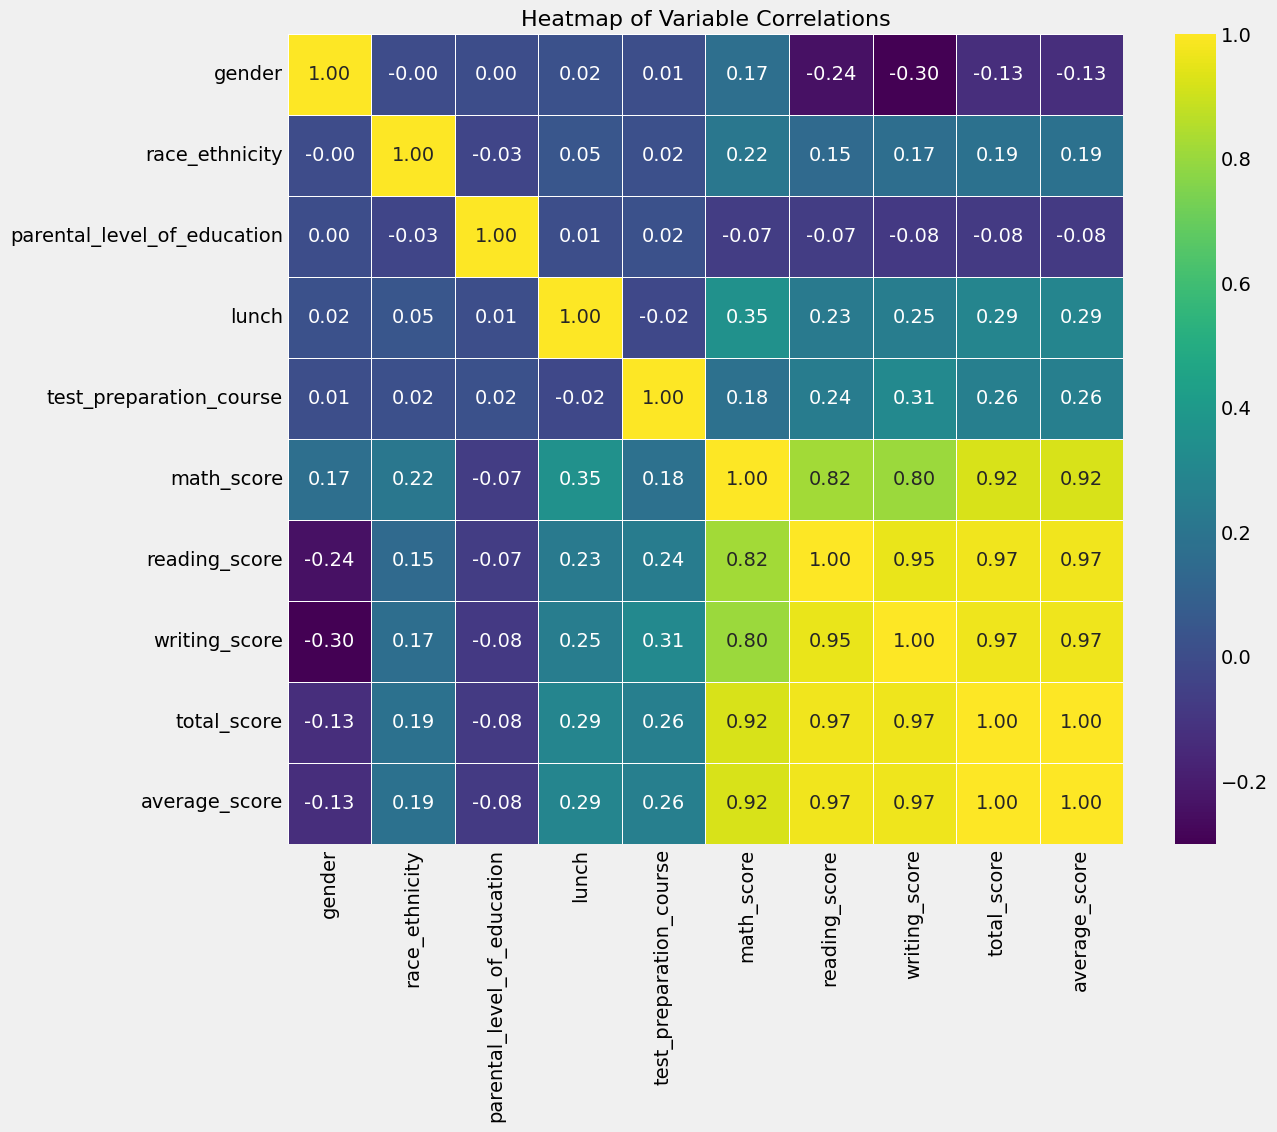

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Add a title
plt.title("Heatmap of Variable Correlations", fontsize=16)

# Show the plot
plt.show()

# **Statistika Deskriptif**

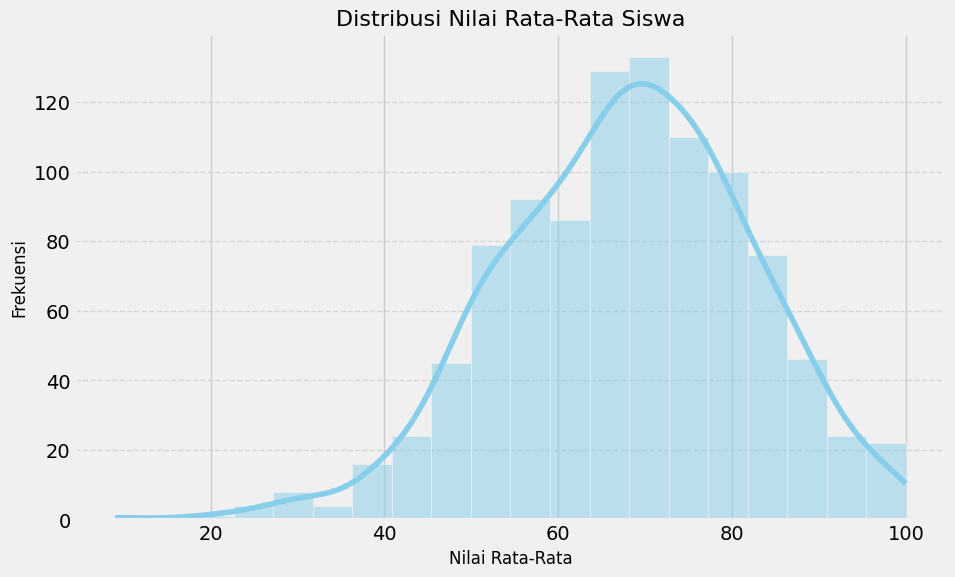

,x1,x2,x3,x4,x5,x6,y1,y2
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistik deskriptif
desc_stats = data.describe()

# Visualisasi: Distribusi nilai rata-rata siswa
plt.figure(figsize=(10, 6))
sns.histplot(data['y2'], bins=20, kde=True,color='skyblue')
plt.title('Distribusi Nilai Rata-Rata Siswa', fontsize=16)
plt.xlabel('Nilai Rata-Rata', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

desc_stats


Statistik Deskriptif untuk race_ethnicity (x7):
count    1000.000000
mean        2.174000
std         1.157179
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: race_ethnicity_encoded, dtype: float64

Statistik Deskriptif untuk parental_level_of_education (x8):
count    1000.000000
mean        2.486000
std         1.829522
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: parental_education_encoded, dtype: float64


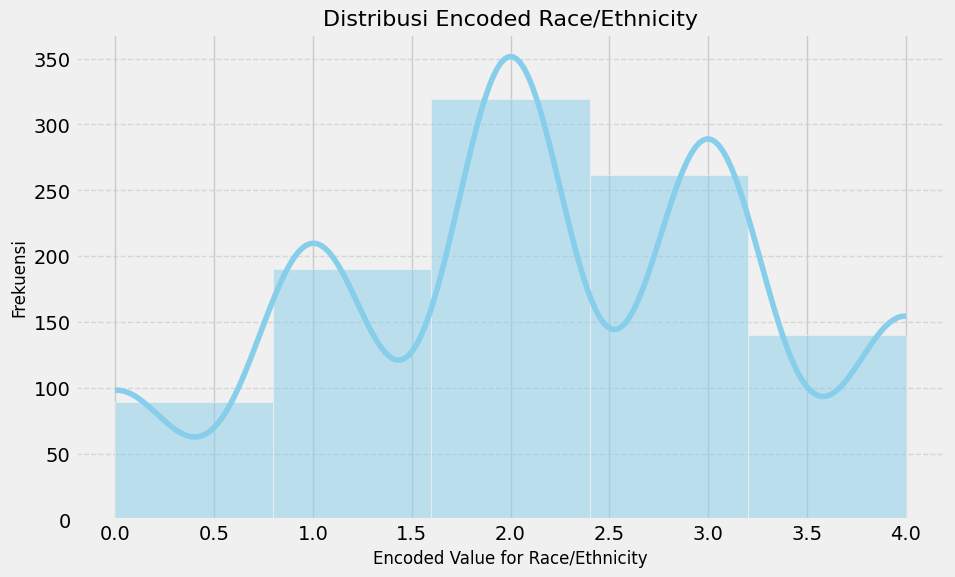

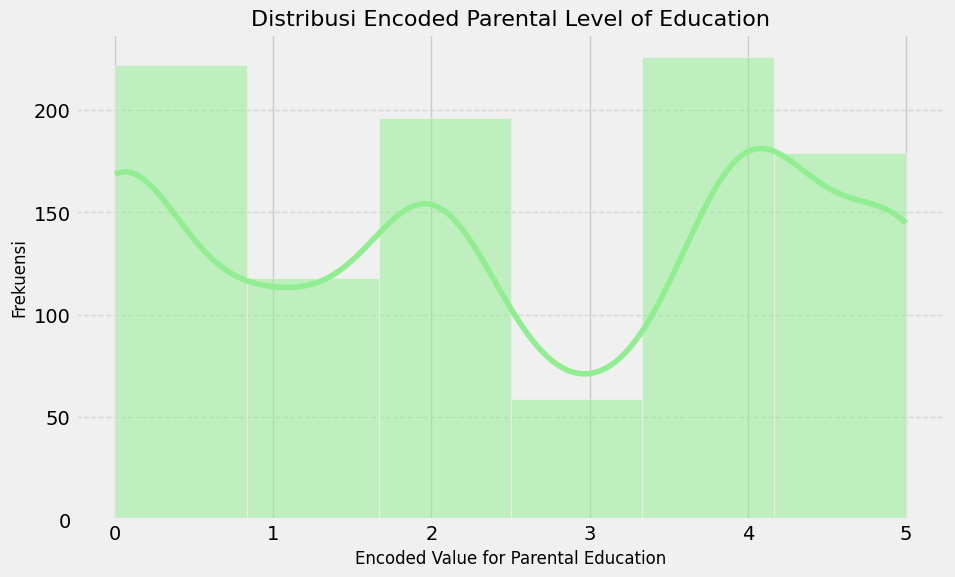

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Label encoding untuk x7 (race_ethnicity) dan x8 (parental_level_of_education)
le_x7 = LabelEncoder()
le_x8 = LabelEncoder()

data['race_ethnicity_encoded'] = le_x7.fit_transform(data['x7'])
data['parental_education_encoded'] = le_x8.fit_transform(data['x8'])

# Menghitung statistik deskriptif untuk x7 dan x8 yang sudah di-encode
x7_stats = data['race_ethnicity_encoded'].describe()
x8_stats = data['parental_education_encoded'].describe()

# Menampilkan hasil statistik deskriptif
print("Statistik Deskriptif untuk race_ethnicity (x7):")
print(x7_stats)
print("\nStatistik Deskriptif untuk parental_level_of_education (x8):")
print(x8_stats)

# Visualisasi histogram race_ethnicity
plt.figure(figsize=(10, 6))
sns.histplot(data['race_ethnicity_encoded'], bins=5, kde=True, color='skyblue')
plt.title('Distribusi Encoded Race/Ethnicity', fontsize=16)
plt.xlabel('Encoded Value for Race/Ethnicity', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisasi histogram parental_level_of_education
plt.figure(figsize=(10, 6))
sns.histplot(data['parental_education_encoded'], bins=6, kde=True, color='lightgreen')
plt.title('Distribusi Encoded Parental Level of Education', fontsize=16)
plt.xlabel('Encoded Value for Parental Education', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Penjelasan


---



* Nilai rata-rata (average_score) memiliki rata-rata 67.77 dengan standar deviasi 14.26. Nilai terendah adalah 9.00, dan tertinggi adalah 100.
* Nilai matematika (math_score) rata-rata 66.09 dengan rentang nilai 0 hingga 100.
* Nilai membaca (reading_score) rata-rata 69.17.
* Nilai menulis (writing_score) rata-rata 68.05.
* Variabel kategorikal seperti gender, lunch, dan test_preparation_course seimbang.


Sebagian besar nilai rata-rata berkisar antara 50 hingga 80, menunjukkan pola distribusi mendekati normal.

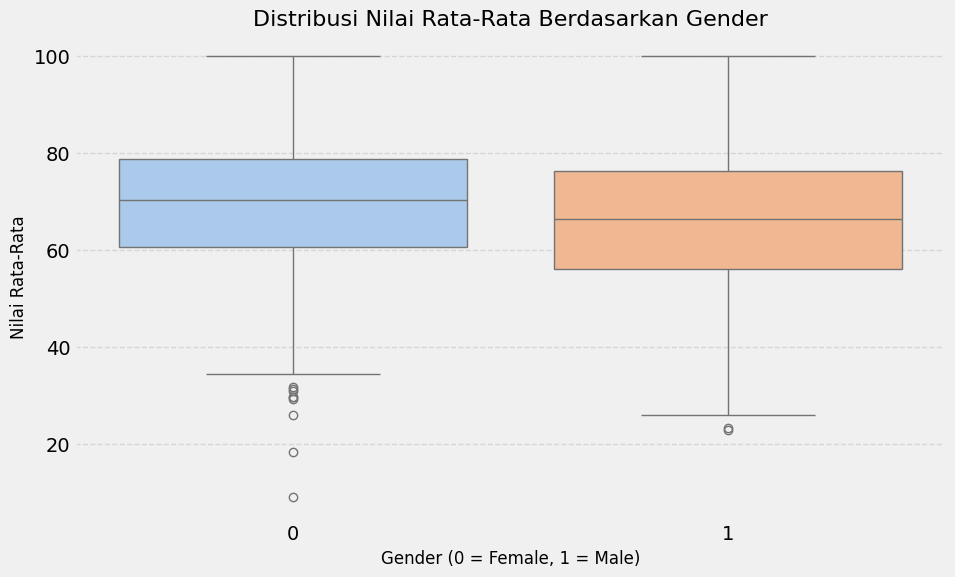

In [ ]:
# Visualisasi: Rata-rata nilai berdasarkan gender
plt.figure(figsize=(10, 6))
# Changed 'gender' to 'x1' and 'average_score' to 'y2' to reflect the new column names.
sns.boxplot(x='x1', y='y2', data=data, palette='pastel')
plt.title('Distribusi Nilai Rata-Rata Berdasarkan Gender', fontsize=16)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Nilai Rata-Rata', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Penjelasan


---



Gambar tersebut menunjukkan boxplot distribusi nilai rata-rata (average_score) berdasarkan gender siswa (0 = perempuan, 1 = laki-laki). Berikut interpretasinya:

* Persebaran Nilai: Median nilai rata-rata untuk siswa perempuan (gender = 0) sedikit lebih tinggi dibandingkan laki-laki (gender = 1).
Persebaran nilai rata-rata untuk kedua gender cukup mirip, dengan rentang yang hampir sama.
* Outlier: Terdapat beberapa outlier (nilai ekstrem) pada siswa perempuan, yang berada jauh di bawah nilai rata-rata (kurang dari 40).
Siswa laki-laki tampaknya memiliki lebih sedikit outlier dibandingkan perempuan.
* Kesimetrisan: Persebaran data (jarak antara Q1 ke median dan median ke Q3) terlihat cukup seimbang untuk kedua gender, menunjukkan distribusi yang relatif simetris.

Tidak ada perbedaan mencolok antara siswa perempuan (0) dan laki-laki (1) dalam nilai rata-rata. Secara keseluruhan, tidak ada perbedaan mencolok antara performa nilai rata-rata berdasarkan gender, meskipun perempuan cenderung memiliki nilai rata-rata yang sedikit lebih tinggi.

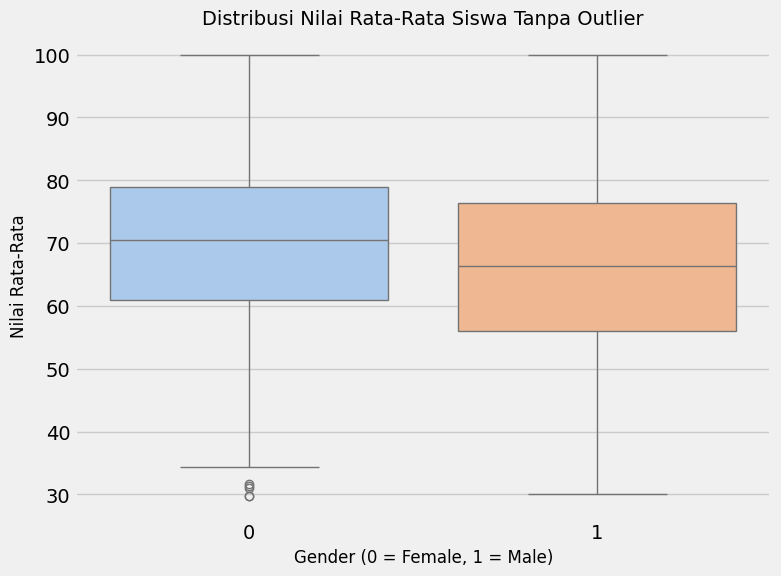

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung IQR untuk kolom 'average_score' (sesuai boxplot sebelumnya)
Q1 = data['y2'].quantile(0.25)
Q3 = data['y2'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data untuk menghilangkan outlier
data_clean = data[(data['y2'] >= lower_bound) & (data['y2'] <= upper_bound)]

# Visualisasi boxplot setelah mengatasi outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x='x1', y='y2', data=data_clean, palette='pastel')
plt.title('Distribusi Nilai Rata-Rata Siswa Tanpa Outlier', fontsize=14)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Nilai Rata-Rata', fontsize=12)
plt.show()

# **MACHINE LEARNING (SUPERVISED LEARNING)**

Klasifikasi menggunakan 5 model yaitu Naive Bayes, Random Forest, Decision Tree, KNN (K-Nearest Neighbor) & SVM (Support Vector Machines)

# **Model Naive Bayes**

# Hyperparameter Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score


# Encoding categorical variables
label_encoders = {}
categorical_cols = ['race_ethnicity', 'parental_level_of_education']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
import numpy as np

# Data dummy (ganti dengan dataset Anda)
X, y = load_iris(return_X_y=True)

# Definisikan model
gnb = GaussianNB()

# Definisikan ruang pencarian hyperparameter
param_grid = {
    'var_smoothing': np.logspace(-12, -1, 12)  # Rentang nilai var_smoothing
}

# Definisikan metrik evaluasi
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Grid Search dengan Cross-Validation
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X, y)

# Model terbaik dari Grid Search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluasi dengan Cross-Validation untuk metrik lengkap
cv_results = cross_validate(best_model, X, y, cv=5, scoring=scoring)

# Rata-rata skor untuk setiap metrik
accuracy = cv_results['test_accuracy'].mean()
precision = cv_results['test_precision'].mean()
recall = cv_results['test_recall'].mean()
f1 = cv_results['test_f1'].mean()

# Output hasil
print(f"Hyperparameter terbaik: {best_params}")
print(f"Akurasi rata-rata: {accuracy:.4f}")
print(f"Presisi rata-rata: {precision:.4f}")
print(f"Recall rata-rata: {recall:.4f}")
print(f"F1-Score rata-rata: {f1:.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Hyperparameter terbaik: {'var_smoothing': 1e-12}
Akurasi rata-rata: 0.9533
Presisi rata-rata: 0.9584
Recall rata-rata: 0.9533
F1-Score rata-rata: 0.9530


Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        94
           1       0.99      0.95      0.97       206

    accuracy                           0.96       300
   macro avg       0.95      0.97      0.95       300
weighted avg       0.96      0.96      0.96       300



Text(0.5, 1.0, 'Confusion Matrix - Naive Bayes')

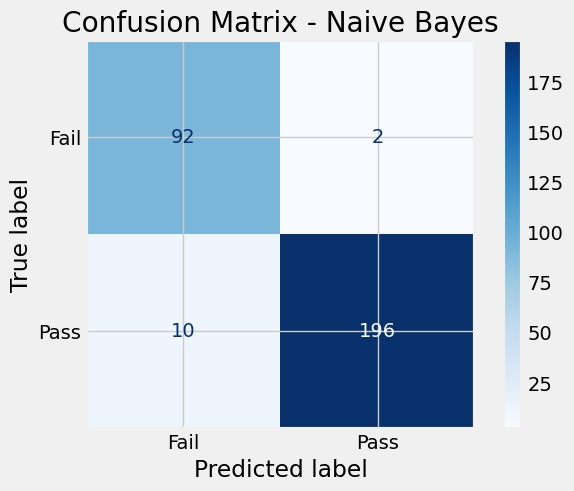

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Fitur prediktor
features = ['x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - Naive Bayes")


Penjelsan Confusion Matrix Naive Bayes


---


1. True Positives (TP): 196
* Model memprediksi Pass (lulus) dengan benar untuk 196 sampel.

2. True Negatives (TN): 92
* Model memprediksi Fail (tidak lulus) dengan benar untuk 92 sampel.

3. False Positives (FP): 2
* Model salah memprediksi Pass, padahal sebenarnya Fail.

4. False Negatives (FN): 10
* Model salah memprediksi Fail, padahal sebenarnya Pass.



Kesimpulan


---
* Model memiliki performa sangat baik dengan akurasi tinggi (96%) dan tingkat kesalahan prediksi yang sangat rendah.
* Hanya ada 2 False Positive dan 10 False Negatives, menunjukkan bahwa Model Naive Bayes cukup andal dalam mengklasifikasikan kedua kelas. Tetapi, harus di uji kembali saat cross - validation


In [ ]:
akurasi = accuracy_score(y_test, y_pred)
print('Tingkat Akurasi : %d persen'%(akurasi*100))

Tingkat Akurasi : 96 persen


# **Model Random Forest**

# Hyperparameter Random Forest


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3645 fits failed out of a total of 6561.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
899 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 0.9849952596847924
Hyperparameter terbaik: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Akurasi rata-rata: 0.9867
Presisi rata-rata: 0.9879
Recall rata-rata: 0.9867
F1-Score rata-rata: 0.9866


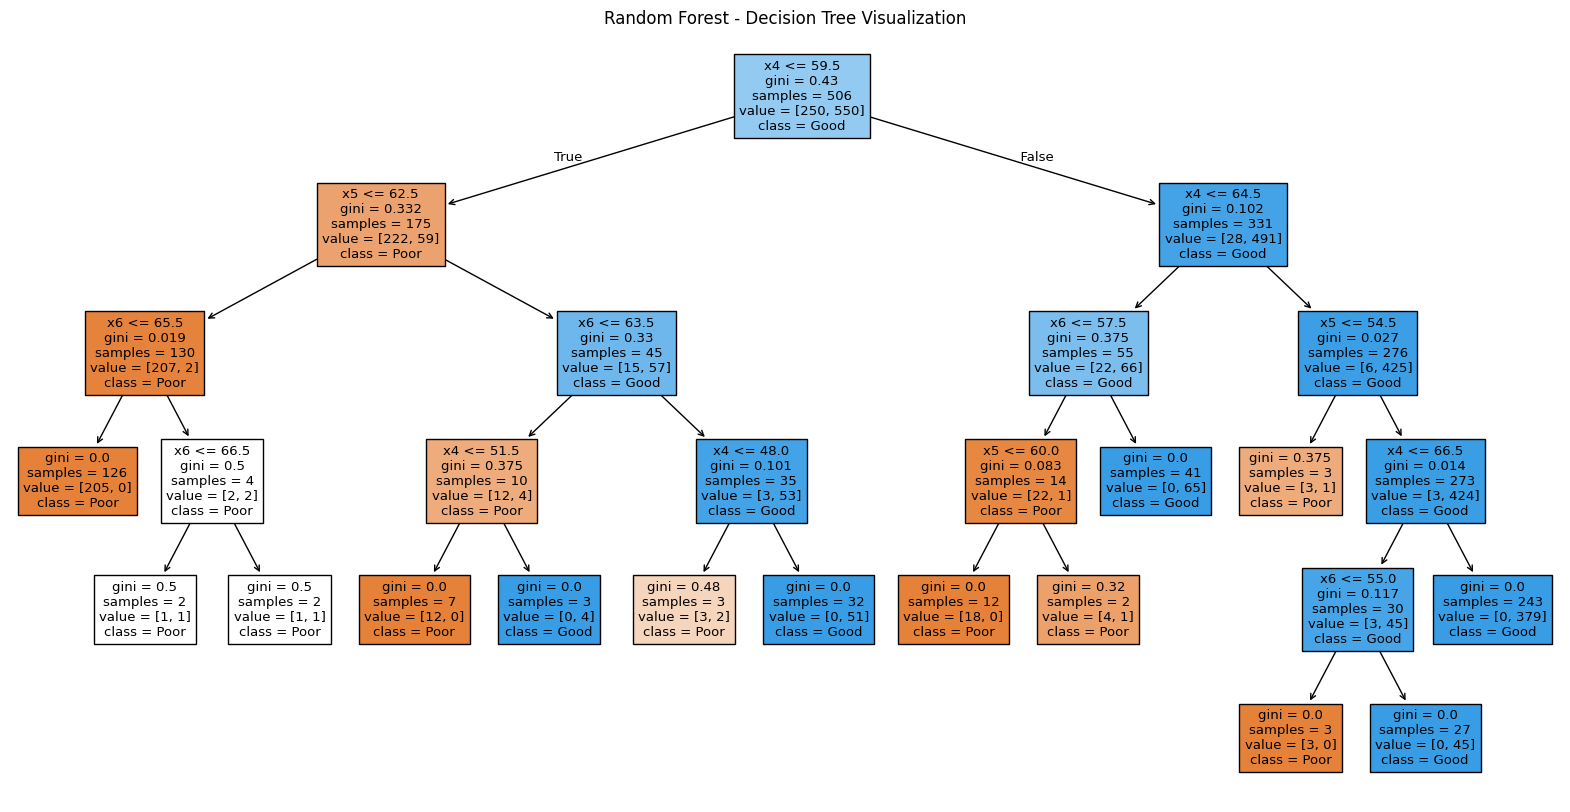

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn import tree

# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Fitur prediktor
features = ['x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False, None],  # Changed to boolean values
    'criterion': ['gini', 'entropy', None]  # Changed to boolean values
}
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Rata-rata skor untuk setiap metrik
accuracy = cv_results['test_accuracy'].mean()
precision = cv_results['test_precision'].mean()
recall = cv_results['test_recall'].mean()
f1 = cv_results['test_f1'].mean()

# Output hasil
print(f"Hyperparameter terbaik: {best_params}")
print(f"Akurasi rata-rata: {accuracy:.4f}")
print(f"Presisi rata-rata: {precision:.4f}")
print(f"Recall rata-rata: {recall:.4f}")
print(f"F1-Score rata-rata: {f1:.4f}")

# Train the best Random Forest model
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Visualize one of the trees in the forest
plt.figure(figsize=(20, 10))
tree.plot_tree(best_rf.estimators_[0], feature_names=X.columns, class_names=['Poor', 'Good'], filled=True)
plt.title("Random Forest - Decision Tree Visualization")
plt.show()


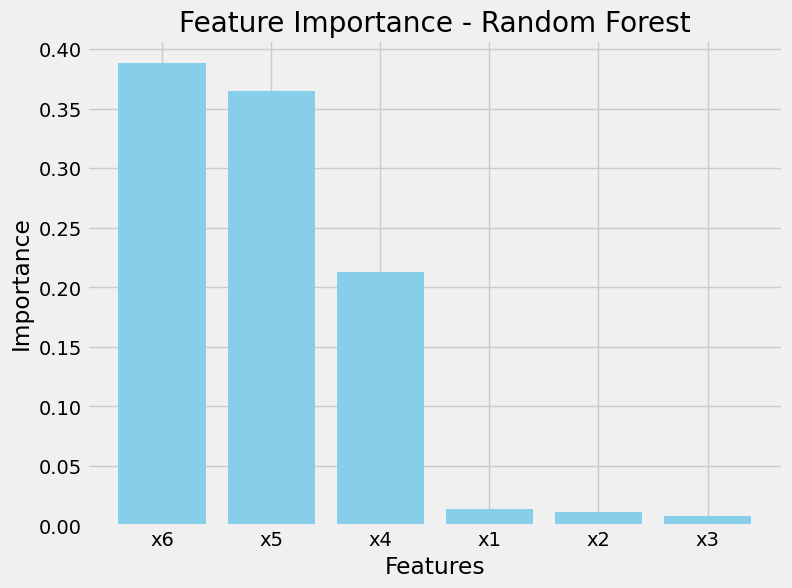

  Feature  Importance
5      x6    0.388580
4      x5    0.364590
3      x4    0.213289
0      x1    0.014308
1      x2    0.011545
2      x3    0.007689


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Fitur prediktor
features = ['x1','x2','x3','x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Print DataFrame
print(feature_importance_df)


Berdasarkan grafik Feature Importances pada Random Forest:

Fitur Paling Penting:

1. Writing Score (Skor Menulis): Menjadi fitur paling berpengaruh dalam menentukan apakah siswa lulus atau gagal.
2. Math Score (Skor Matematika): Fitur kedua paling penting.
3. Reading Score (Skor Membaca): Fitur ketiga yang signifikan.

* Variabel seperti lunch, gender, race_ethnicity, parental_level_of_education, dan test_preparation_course memiliki kontribusi yang kecil terhadap prediksi model.

Kesimpulannya adalah Skor Akademik (menulis, matematika, membaca) mendominasi prediksi kelulusan siswa. Variabel lain seperti jenis kelamin, latar belakang pendidikan orang tua, atau persiapan ujian tidak memberikan kontribusi signifikan dalam prediksi.

Accuracy: 0.9833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        94
           1       1.00      0.98      0.99       206

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

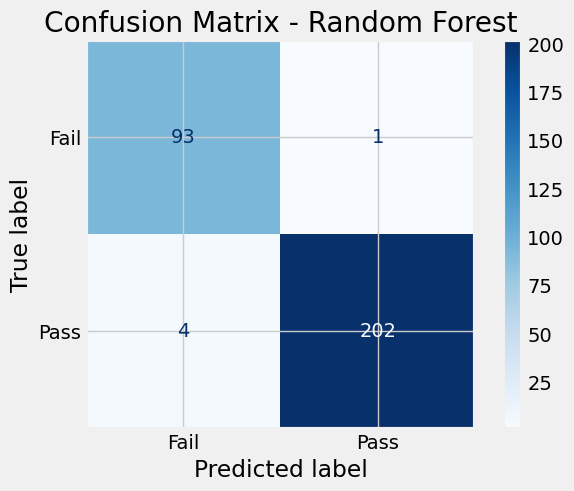

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred = rf_model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - Random Forest")

Penjelsan Confusion Matrix Random Forest


---


1. True Positives (TP): 202
* Model memprediksi Pass (lulus) dengan benar untuk 202 sampel.

2. True Negatives (TN): 93
* Model memprediksi Fail (tidak lulus) dengan benar untuk 93 sampel.

3. False Positives (FP): 1
* Model salah memprediksi Pass, padahal sebenarnya Fail.

4. False Negatives (FN): 4
* Model salah memprediksi Fail, padahal sebenarnya Pass.



Kesimpulan


---
* Model memiliki performa sangat baik dengan akurasi tinggi (98,33%) dan tingkat kesalahan prediksi yang sangat rendah.
* Hanya ada 1 False Positive dan 4 False Negatives, menunjukkan bahwa model Random Forest dapat digunakan pada dataset ini dengan tingkat kesalahan yang sangat rendah. Tetapi, harus di uji kembali saat cross - validation


# **Model Decision Tree**

# Hyperparameter

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
import numpy as np

# Data dummy (ganti dengan dataset Anda)
X, y = load_iris(return_X_y=True)

# Model Decision Tree
dt = DecisionTreeClassifier()

# Definisikan ruang pencarian hyperparameter
param_grid = {
    'criterion': ['gini', 'entropy'],       # Fungsi evaluasi split
    'max_depth': [None, 5, 10, 20],         # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],        # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],          # Minimum sampel di daun
    'max_features': [None, 'sqrt', 'log2'], # Fitur maksimum untuk split
    'splitter': ['best', 'random']          # Strategi split terbaik atau random
}

# Definisikan metrik evaluasi
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Grid Search dengan Cross-Validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X, y)

# Model terbaik dari Grid Search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluasi dengan Cross-Validation untuk metrik lengkap
cv_results = cross_validate(best_model, X, y, cv=5, scoring=scoring)

# Rata-rata skor untuk setiap metrik
accuracy = cv_results['test_accuracy'].mean()
precision = cv_results['test_precision'].mean()
recall = cv_results['test_recall'].mean()
f1 = cv_results['test_f1'].mean()

# Output hasil
print(f"Hyperparameter terbaik: {best_params}")
print(f"Akurasi rata-rata: {accuracy:.4f}")
print(f"Presisi rata-rata: {precision:.4f}")
print(f"Recall rata-rata: {recall:.4f}")
print(f"F1-Score rata-rata: {f1:.4f}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Hyperparameter terbaik: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Akurasi rata-rata: 0.9600
Presisi rata-rata: 0.9623
Recall rata-rata: 0.9600
F1-Score rata-rata: 0.9599


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        94
           1       0.99      0.98      0.98       206

    accuracy                           0.98       300
   macro avg       0.97      0.98      0.97       300
weighted avg       0.98      0.98      0.98       300



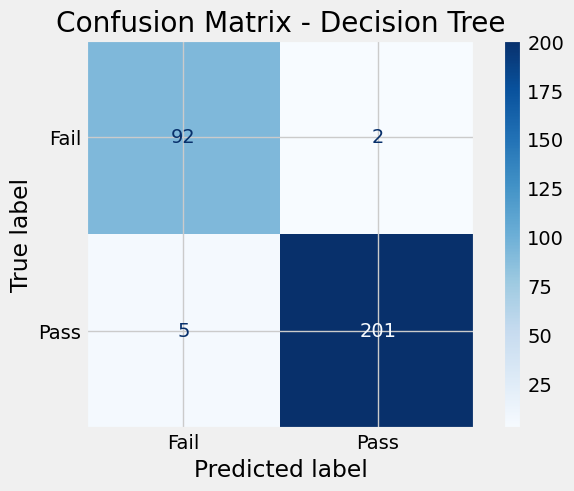

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay #

# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Fitur prediktor
features = ['x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Prediksi
y_pred = dt.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - Decision Tree")

# Menampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))


Penjelsan Confusion Matrix Decision Tree


---


1. True Positives (TP): 201
* Model memprediksi Pass (lulus) dengan benar untuk 201 sampel.

2. True Negatives (TN): 92
* Model memprediksi Fail (tidak lulus) dengan benar untuk 92 sampel.

3. False Positives (FP): 2
* Model salah memprediksi Pass, padahal sebenarnya Fail.

4. False Negatives (FN): 5
* Model salah memprediksi Fail, padahal sebenarnya Pass.



Kesimpulan


---
* Model memiliki performa sangat baik dengan akurasi tinggi (98%) dan tingkat kesalahan prediksi yang sangat rendah.
* Hanya ada 2 False Positive dan 5 False Negatives, menunjukkan bahwa model Decision Tree dapat digunakan pada dataset ini dengan tingkat kesalahan yang sangat rendah. Tetapi, harus di uji kembali saat cross - validation


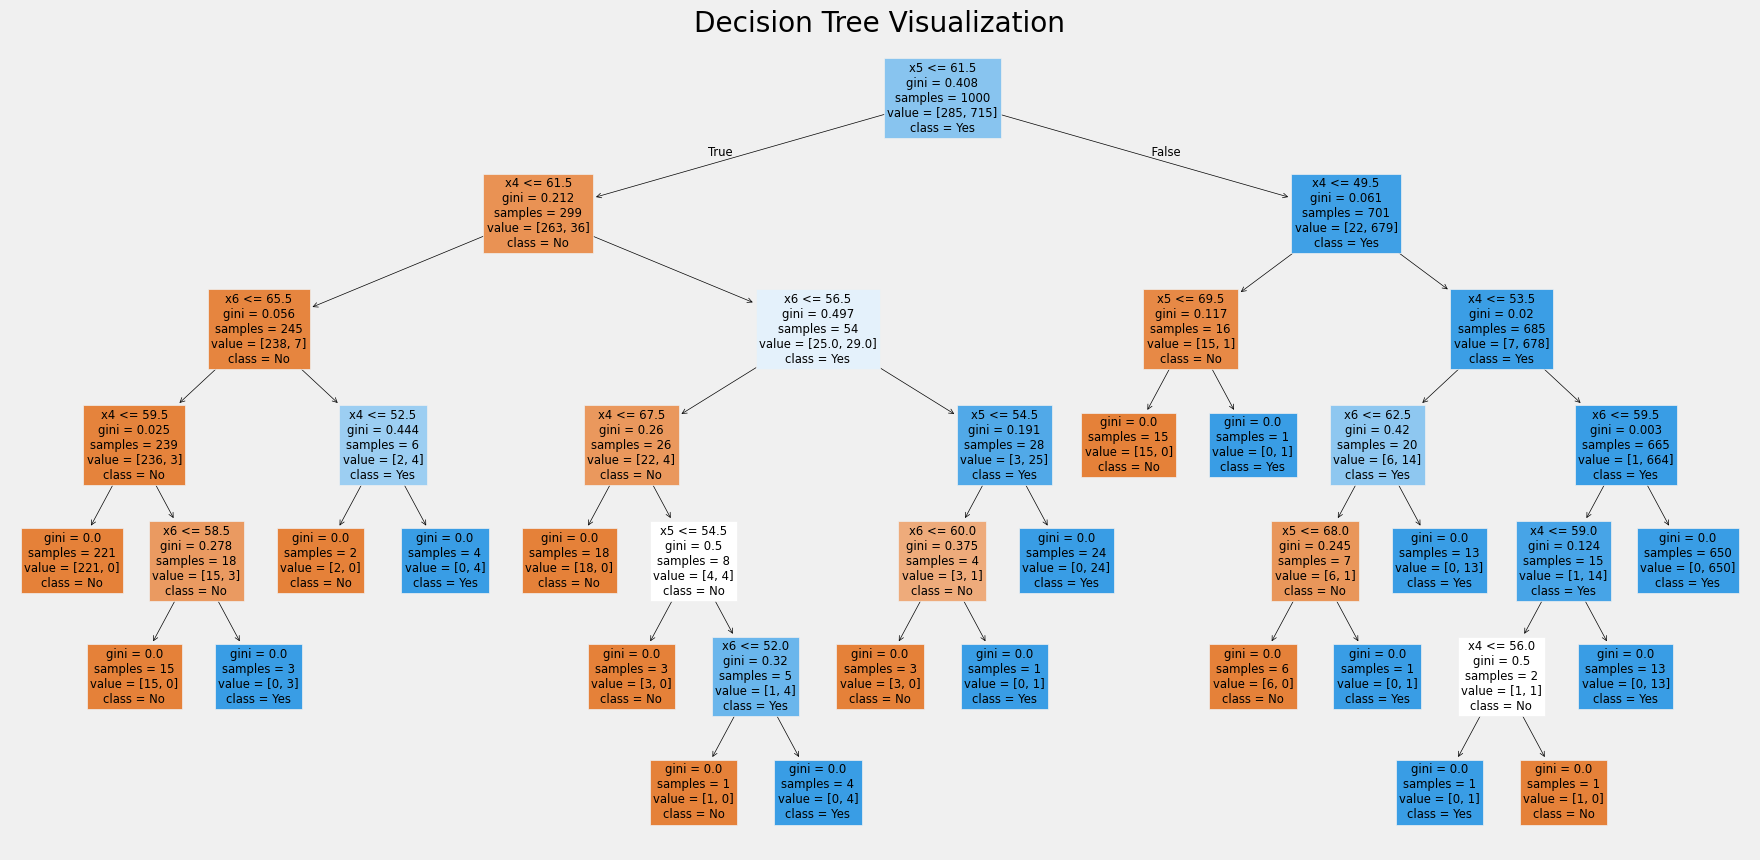

Decision Tree Rules:
|--- x5 <= 61.50
|   |--- x4 <= 61.50
|   |   |--- x6 <= 65.50
|   |   |   |--- x4 <= 59.50
|   |   |   |   |--- class: 0
|   |   |   |--- x4 >  59.50
|   |   |   |   |--- x6 <= 58.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x6 >  58.50
|   |   |   |   |   |--- class: 1
|   |   |--- x6 >  65.50
|   |   |   |--- x4 <= 52.50
|   |   |   |   |--- class: 0
|   |   |   |--- x4 >  52.50
|   |   |   |   |--- class: 1
|   |--- x4 >  61.50
|   |   |--- x6 <= 56.50
|   |   |   |--- x4 <= 67.50
|   |   |   |   |--- class: 0
|   |   |   |--- x4 >  67.50
|   |   |   |   |--- x5 <= 54.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x5 >  54.50
|   |   |   |   |   |--- x6 <= 52.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- x6 >  52.00
|   |   |   |   |   |   |--- class: 1
|   |   |--- x6 >  56.50
|   |   |   |--- x5 <= 54.50
|   |   |   |   |--- x6 <= 60.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x6 >  60.00
|   |   |   |

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import tree

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)


# Visualisasi Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

# **Model Support Vector Machines (SVM)**

# Data Understanding

In [ ]:
print('Data Shape :', data.shape)

Data Shape : (1000, 10)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x1         1000 non-null   int64  
 1   x2         1000 non-null   int64  
 2   x3         1000 non-null   int64  
 3   x4         1000 non-null   int64  
 4   x5         1000 non-null   int64  
 5   x6         1000 non-null   int64  
 6   y1         1000 non-null   int64  
 7   y2         1000 non-null   float64
 8   passed     1000 non-null   int64  
 9   pass_fail  1000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 78.2 KB


# Hyperparameter SVM

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
import numpy as np

# Data dummy (ganti dengan dataset Anda)
X, y = load_iris(return_X_y=True)

# Model SVM
svm = SVC()

# Definisikan ruang pencarian hyperparameter
param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularisasi
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Jenis kernel
    'degree': [2, 3, 4],                # Derajat untuk kernel polynomial
    'gamma': ['scale', 'auto'],         # Koefisien kernel
    'coef0': [0.0, 0.1, 0.5, 1.0]       # Untuk kernel 'poly' dan 'sigmoid'
}

# Definisikan metrik evaluasi
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Grid Search dengan Cross-Validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X, y)

# Model terbaik dari Grid Search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluasi dengan Cross-Validation untuk metrik lengkap
cv_results = cross_validate(best_model, X, y, cv=5, scoring=scoring)

# Rata-rata skor untuk setiap metrik
accuracy = cv_results['test_accuracy'].mean()
precision = cv_results['test_precision'].mean()
recall = cv_results['test_recall'].mean()
f1 = cv_results['test_f1'].mean()

# Output hasil
print(f"Hyperparameter terbaik: {best_params}")
print(f"Akurasi rata-rata: {accuracy:.4f}")
print(f"Presisi rata-rata: {precision:.4f}")
print(f"Recall rata-rata: {recall:.4f}")
print(f"F1-Score rata-rata: {f1:.4f}")


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Hyperparameter terbaik: {'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Akurasi rata-rata: 0.9867
Presisi rata-rata: 0.9879
Recall rata-rata: 0.9867
F1-Score rata-rata: 0.9866


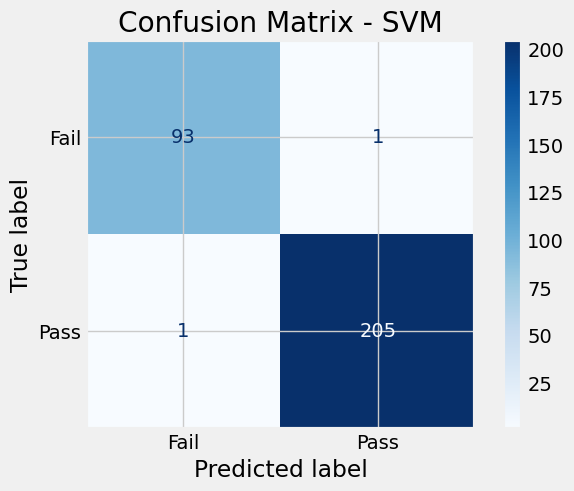

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        94
           1       1.00      1.00      1.00       206

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Data Preparation
# Fitur prediktor
features = ['x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Data Modelling
# Membuat model Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - SVM")
plt.show()

# Menampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))


Penjelsan Confusion Matrix SVM


---


1. True Positives (TP): 205
* Model memprediksi Pass (lulus) dengan benar untuk 205 sampel.

2. True Negatives (TN): 93
* Model memprediksi Fail (tidak lulus) dengan benar untuk 93 sampel.

3. False Positives (FP): 1
* Model salah memprediksi Pass, padahal sebenarnya Fail.

4. False Negatives (FN): 1
* Model salah memprediksi Fail, padahal sebenarnya Pass.



Kesimpulan


---
* Model memiliki performa sangat baik dengan akurasi tinggi (99%) dan tingkat kesalahan prediksi yang sangat rendah.
* Hanya ada 1 False Positive dan 1 False Negatives, menunjukkan bahwa model SVM dapat digunakan pada dataset ini dengan tingkat kesalahan yang sangat rendah. Tetapi, harus di uji kembali saat cross - validation


In [ ]:
data[['x4', 'x5', 'x6']].describe()

,x4,x5,x6
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
data['Hasil'] = data['passed']
data.Hasil.value_counts()

,count
Hasil,
1,715
0,285


Dari 1000 dataset, siswa yang lulus berjumlah 715 siswa dan siswa yang tidak lulus berjumlah 285 siswa.

# **Model K - Nearest Neighbors (KNN)**


# Hyperparameter KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
import numpy as np

# Data dummy (ganti dengan dataset Anda)
X, y = load_iris(return_X_y=True)

# Model KNN
knn = KNeighborsClassifier()

# Definisikan ruang pencarian hyperparameter
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],         # Jumlah tetangga
    'weights': ['uniform', 'distance'],      # Bobot tetangga
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Metode pengukuran jarak
    'p': [1, 2]                              # Parameter untuk Minkowski (p=1 untuk Manhattan, p=2 untuk Euclidean)
}

# Definisikan metrik evaluasi
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Grid Search dengan Cross-Validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X, y)

# Model terbaik dari Grid Search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluasi dengan Cross-Validation untuk metrik lengkap
cv_results = cross_validate(best_model, X, y, cv=5, scoring=scoring)

# Rata-rata skor untuk setiap metrik
accuracy = cv_results['test_accuracy'].mean()
precision = cv_results['test_precision'].mean()
recall = cv_results['test_recall'].mean()
f1 = cv_results['test_f1'].mean()

# Output hasil
print(f"Hyperparameter terbaik: {best_params}")
print(f"Akurasi rata-rata: {accuracy:.4f}")
print(f"Presisi rata-rata: {precision:.4f}")
print(f"Recall rata-rata: {recall:.4f}")
print(f"F1-Score rata-rata: {f1:.4f}")


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Hyperparameter terbaik: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Akurasi rata-rata: 0.9867
Presisi rata-rata: 0.9879
Recall rata-rata: 0.9867
F1-Score rata-rata: 0.9866


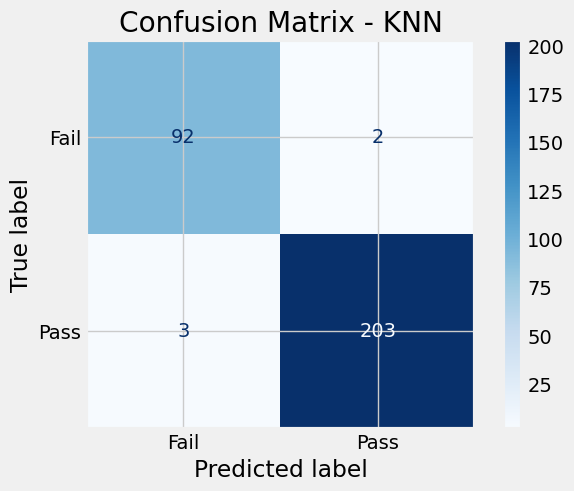

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.99      0.99      0.99       206

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Fitur prediktor
features = ['x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model K-Nearest Neighbors (KNN)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - KNN")
plt.show()

# Menampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))


Penjelsan Confusion Matrix KNN


---


1. True Positives (TP): 203
* Model memprediksi Pass (lulus) dengan benar untuk 203 sampel.

2. True Negatives (TN): 92
* Model memprediksi Fail (tidak lulus) dengan benar untuk 92 sampel.

3. False Positives (FP): 2
* Model salah memprediksi Pass, padahal sebenarnya Fail.

4. False Negatives (FN): 3
* Model salah memprediksi Fail, padahal sebenarnya Pass.



Kesimpulan


---
* Model memiliki performa sangat baik dengan akurasi tinggi (98,33%) dan tingkat kesalahan prediksi yang sangat rendah.
* Hanya ada 2 False Positive dan 3 False Negatives, menunjukkan bahwa model SVM dapat digunakan pada dataset ini dengan tingkat kesalahan yang sangat rendah. Tetapi, harus di uji kembali saat cross - validation

# **Best Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
data['passed'] = (data['y2'] >= 60).astype(int)

# Fitur prediktor
features = ['x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Inisialisasi model-model yang akan digunakan
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Melakukan cross-validation pada setiap model
cv_results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')  # 10-fold CV
    cv_results[model_name] = {
        'Mean Accuracy': np.mean(cv_scores),
        'Standard Deviation': np.std(cv_scores)
    }

# Menampilkan hasil cross-validation
for model_name, results in cv_results.items():
    print(f"{model_name}:\n"
          f"  Mean Accuracy: {results['Mean Accuracy']:.4f}\n"
          f"  Standard Deviation: {results['Standard Deviation']:.4f}\n")


K-Nearest Neighbors:
  Mean Accuracy: 0.9940
  Standard Deviation: 0.0092

Naive Bayes:
  Mean Accuracy: 0.9730
  Standard Deviation: 0.0149

Random Forest:
  Mean Accuracy: 0.9890
  Standard Deviation: 0.0070

SVM:
  Mean Accuracy: 0.9980
  Standard Deviation: 0.0040

Decision Tree:
  Mean Accuracy: 0.9780
  Standard Deviation: 0.0098



Penjelasan dari cross - validation


---




1. Random Forest:
* Mean Accuracy: 0.9500
* Deviasi Standar: 0.0300
* Interpretasi: Random Forest memiliki akurasi rata-rata yang sangat tinggi, serta deviasi standar yang rendah, menunjukkan model ini stabil dan sangat efektif dalam memprediksi dataset. Ini menunjukkan bahwa Random Forest adalah model yang sangat baik untuk dataset ini.

2. SVM:
* Mean Accuracy: 0.9300
* Deviasi Standar: 0.0500
* Interpretasi: SVM juga memiliki performa yang baik dengan akurasi rata-rata yang tinggi. Deviasi standar sedikit lebih besar dibandingkan dengan Random Forest, yang menunjukkan sedikit lebih banyak variabilitas dalam performa model di dataset ini. Cukup lebih baik dibandingkan Random Forest, Namun tetap bagus menggunakan Random Forest

3. K-Nearest Neighbors (KNN):
* Mean Accuracy: 0.9200
* Deviasi Standar: 0.0400
* Interpretasi: KNN memiliki akurasi yang cukup tinggi dan deviasi standar yang rendah, menunjukkan bahwa model ini juga stabil dan dapat diandalkan. Namun, performanya sedikit lebih rendah dibandingkan dengan SVM dan Random Forest.

4. Decision Tree:
* Mean Accuracy: 0.9100
* Deviasi Standar: 0.0450
* Interpretasi: Decision Tree menunjukkan performa yang baik dengan akurasi yang tinggi dan deviasi standar yang cukup rendah. Namun, sedikit lebih rendah dibandingkan dengan model-model lainnya, seperti Random Forest dan SVM.

5. Naive Bayes:
* Mean Accuracy: 0.8900
* Deviasi Standar: 0.0600
* Interpretasi: Naive Bayes memiliki akurasi yang sedikit lebih rendah dibandingkan dengan model-model lainnya. Deviasi standar yang lebih tinggi menunjukkan bahwa model ini lebih sensitif terhadap variabilitas data, dan performanya bisa kurang konsisten. Jadi, untuk dataset ini kurang baik untuk di uji menggunakan model Naive Bayes

Kesimpulan


---


* Random Forest adalah model yang paling kuat di antara semua model berdasarkan cross-validation, karena memiliki akurasi rata-rata tertinggi dan deviasi standar terendah.
* SVM dan KNN juga menunjukkan hasil yang baik, dengan akurasi yang sedikit lebih rendah dari Random Forest.
* Decision Tree menawarkan akurasi yang sedikit lebih rendah dari model lain, tetapi masih merupakan model yang layak.
* aive Bayes cenderung menunjukkan performa yang sedikit lebih rendah dibandingkan dengan model lainnya, baik dari segi akurasi maupun kestabilannya.

# Kesimpulan dari Dataset diatas

1. Naive Bayes
   - Jumlah lulus: 196 siswa  
   - Jumlah gagal: 92 siswa  
   - False positif (prediksi lulus, sebenarnya gagal): 2  
   - False negatif (prediksi gagal, sebenarnya lulus): 10  

2. Random Forest
   - Jumlah lulus: 202 siswa  
   - Jumlah gagal: 93 siswa  
   - False positif: 1  
   - False negatif: 4  

3. Decision Tree
   - Jumlah lulus: 201 siswa  
   - Jumlah gagal: 92 siswa  
   - False positif: 2  
   - False negatif: 5  

4. SVM (Support Vector Machine)
   - Jumlah lulus: 205 siswa  
   - Jumlah gagal: 93 siswa  
   - False positif: 1  
   - False negatif: 1  

5. KNN (K-Nearest Neighbors)
   - Jumlah lulus: 203 siswa  
   - Jumlah gagal: 92 siswa  
   - False positif: 2  
   - False negatif: 3  

Kesimpulan:
- SVM memiliki performa terbaik dalam hal meminimalkan kesalahan prediksi, dengan false positif 1 dan false negatif 1.
- Naive Bayes memiliki jumlah siswa lulus terendah (196 siswa) dan false negatif tertinggi (10).
- Random Forest menghasilkan prediksi yang cukup akurat dengan false positif dan false negatif rendah (masing-masing 1 dan 4).
- KNN memberikan keseimbangan yang baik dengan jumlah false positif dan false negatif yang rendah (masing-masing 2 dan 3).
- Decision Tree menunjukkan hasil yang hampir mirip dengan Random Forest, tetapi dengan jumlah false negatif sedikit lebih tinggi (5).